In [1]:
# statsmodels 설치
# 검정 및 추정, 회귀 분석, 시계열 분석 기능을 제공하는 통계분석 파이썬 패키지

%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------- ----- 8.4/9.8 MB 43.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 40.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# data에 넣은 seles.csv 파일을 이용한 예제
# ARIMA()의 값을 ARIMA(5, 1, 0)
# 5는 회귀 차수, 차분차수는 1, 이동 평균차수는 0으로
# ARIMA가 동작하는 것을 확인

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Mon, 27 Jan 2025   AIC                            411.302
Time:                        11:40:54   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

C:\Users\Admin\AppData\Local\Temp\ipykernel_8532\1640849095.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('./data/sales.csv',
d:\tensorflow\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


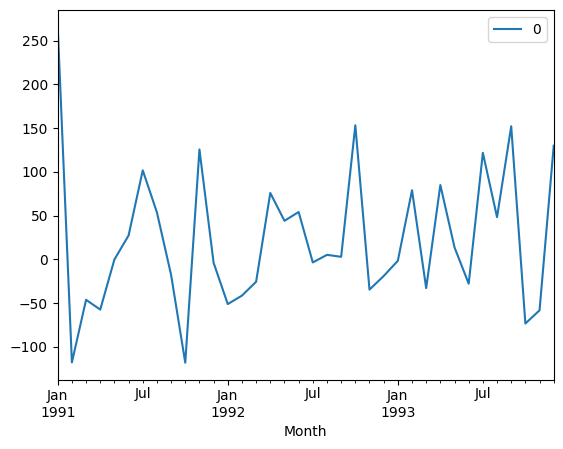

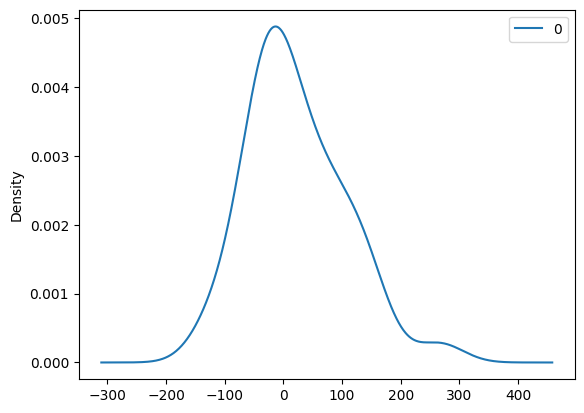

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [17]:
from datetime import datetime   # 날짜에 대한 작업을 위해서 필요한 모듈
from pandas import read_csv     # csv 파일을 읽어서 DataFrame으로 반환하는 함수
from pandas import DataFrame    
import statsmodels.api as sm    # 기존 코드의 ARIMA 기능을 구현한 함수가 Deprecated됨, 
                                # statsmodels.api를 통해서 ARIMA() 함수를 불러다 사용
from matplotlib import pyplot
# csv내에 있는 날짜 값을 변환하는 함수 구현.
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m') # csv내에 있는 날짜를 변경(1991-01 : 년도와 월로 변경)
# print(parser('1-02'))   # parser를 사용하는 문자열을 datetime 시간 값으로 변경.(1991-02-01 00:00:00)
series = read_csv('./data/sales.csv', 
                  header=0,                 # 헤더값 위치(행)
                  parse_dates=['Month'],    # parse_datas 는 날짜로
                  index_col=['Month'],      # index_col은 해당 컬럼을 인덱스 값으로 사용.
                  date_parser=parser)       # 함수를 이용한 날짜 형식 변환
model = sm.tsa.arima.ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)      # 모델에 대한 오차 정보(model_fit.resud)를 
                                            # DataFrame으로 residuals변수에 저장
residuals.plot()                            # plot() 선 그래프
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\Users\Admin\AppData\Local\Temp\ipykernel_8532\2623085729.py:15: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('./data/sales.csv',
C:\Users\Admin\AppData\Local\Temp\ipykernel_8532\2623085729.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070408, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690695, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916190, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


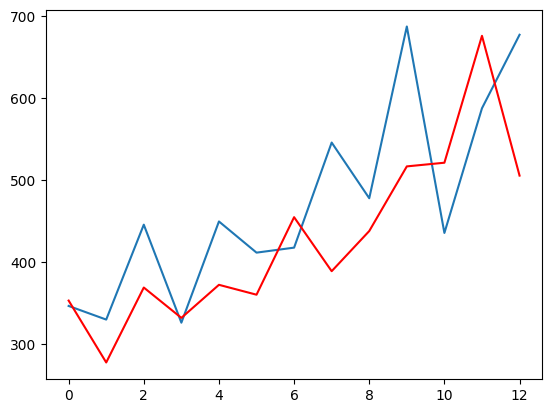

In [35]:
# 예측
import numpy as np
from datetime import datetime   # 날짜에 대한 작업을 위해서 필요한 모듈
from pandas import read_csv     # csv 파일을 읽어서 DataFrame으로 반환하는 함수
from pandas import DataFrame    
import statsmodels.api as sm    # 기존 코드의 ARIMA 기능을 구현한 함수가 Deprecated됨, 
                                # statsmodels.api를 통해서 ARIMA() 함수를 불러다 사용
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# csv내에 있는 날짜 값을 변환하는 함수 구현.
def parser(x):
    return datetime.strptime('199'+x, '%Y-%m') # csv내에 있는 날짜를 변경(1991-01 : 년도와 월로 변경)
# print(parser('1-02'))   # parser를 사용하는 문자열을 datetime 시간 값으로 변경.(1991-02-01 00:00:00)
series = read_csv('./data/sales.csv', 
                  header=0,                 # 헤더값 위치(행)
                  parse_dates=['Month'],    # parse_datas 는 날짜로
                  index_col=['Month'],      # index_col은 해당 컬럼을 인덱스 값으로 사용.
                  date_parser=parser        # 함수를 이용한 날짜 형식 변환
)
# 훈련 및 검증 데이터 생성 (전처리)
X = series.values       # Sales 컬럼에 있는 값들을 출력(array)
                        # 만약에 컬럼이 하나가 아니면, 다른 컬럼 값도 같이 출력됨
# 결측치 값 처리
X = np.nan_to_num(X)    # NaN 처리 함수, NaN을 0으로 변경
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]     # train과 test 데이터셋을 분리
history = [x for x in train]                # 이전값이니까 history라는 변수명을 사용
# history
predictions = list()        # 예측값
for i in range(len(test)):                  # test 데이터 셋의 길이 만큼 반복
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))  # ARIMA() 호출
    model_fit = model.fit()
    output = model_fit.forecast()           # 예측
    yhat = output[0]
    predictions.append(yhat)                # 예측 결과를 predictions에 저장
    obs = test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# 오차율 (MSE - 평균 제곱 오차) - 손실함수로 평균제곱 오차를 사용
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error:.3f}')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [1]:
# IMDB 데이터셋
# 영화 관련 리뷰를 가지고 있는 데이터 셋
# 라이브러리
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [2]:
# 필요한 초기화
tf.random.set_seed(22) # 랜덤 시드값 설정
np.random.seed(22)

assert tf.__version__.startswith('2.')      # 버전 검증(tensorflow 2버전인지 확인)

batch_size = 128
total_words = 10000
max_review_len = 80
embedding_len = 100


In [3]:
# 모형 적용을 위한 데이터셋 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)

# 전처리 작업 - 최대 길이 값보다 작은 경우, 값의 길이를 같게 만들기 위해서 패딩값(보통 0)으로 채우기
# pad_sequences() - 모델에 넣을 데이터를 만들기 위해서 동일한 크기의 데이터로 생성
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

# tf.data.Datset 만들기
# 훈련 데이터
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(10000).batch(batch_size, drop_remainder=True)   # drop_remainder 마지막 배치 크기를 무시하고 지정한 배치 크기를 사용
# 검증 데이터
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size, drop_remainder=True)

print('x_train.shape : ', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test.shape : ', x_test.shape)

sample = next(iter(test_data))
print(sample[0].shape)

x_train.shape :  (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test.shape :  (25000, 80)
(128, 80)


In [50]:
x_train[0]

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,
        530,  476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,
        104,   88,    4,  381,   15,  297,   98,   32, 2071,   56,   26,
        141,    6,  194, 7486,   18,    4,  226,   22,   21,  134,  476,
         26,  480,    5,  144,   30, 5535,   18,   51,   36,   28,  224,
         92,   25,  104,    4,  226,   65,   16,   38, 1334,   88,   12,
         16,  283,    5,   16, 4472,  113,  103,   32,   15,   16, 5345,
         19,  178,   32], dtype=int32)

In [45]:
len(x_train) 
len(x_test)
len(y_train)
len(y_test)     # 전부 25000 개씩

25000

In [4]:
# 책 예제와 다른부분을 체크해서 잘 보기!

class RNN_Build(tf.keras.Model): 
    def __init__(self, units):
        super(RNN_Build, self).__init__()

        # self.state0 = [tf.zeros([batch_size, units])] 
        # self.state1 = [tf.zeros([batch_size, units])]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len,
                                                   input_length=max_review_len)
        # RNNCell0 -> RNN0
        self.RNN0 = tf.keras.layers.RNN(
            tf.keras.layers.SimpleRNNCell(units, dropout=0.2),
            return_sequences=True
        ) 
        self.RNN1 = tf.keras.layers.RNN(
            tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        )
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        # state0 = self.state0
        # state1 = self.state1
        # for word in tf.unstack(x, axis=1):
        #     out0, state0 = self.RNNCell0(word, state0, training=training) 
        #     out1, state1 = self.RNNCell1(out0, state1, training=training) 
        x = self.RNN0(x, training=training)
        x = self.RNN1(x, training=training)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        return prob 

In [5]:
import time
units = 64
epochs = 4
t0 = time.time() # 구동 시간을 비교하기 위해서...

model = RNN_Build(units) # 객체 생성
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4


d:\tensorflow\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5261 - loss: 0.6896
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8425 - loss: 0.3674 - val_accuracy: 0.8256 - val_loss: 0.3966
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9221 - loss: 0.1975
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9694 - loss: 0.0859 - val_accuracy: 0.7980 - val_loss: 0.7158


In [6]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.0550, accuracy: 97.8846%
테스트 데이터셋 평가...
loss=0.7158, accuracy: 79.7957%
시간: 43.300466775894165


In [9]:
# SimpleRNN Layer 구현

# 모델 정의
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()
        # Embedding 계층
        self.embedding = tf.keras.layers.Embedding(total_words,
                                                   embedding_len)
        # RNN 계층구현
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(units, dropout=0.5, return_sequences=True),
            tf.keras.layers.SimpleRNN(units, dropout=0.5)
        ])
        # 출력 계층
        self.outlayer = tf.keras.layers.Dense(1)
    
    # 객체 호출시 동작(tensorflow에서 불로올떄 호출될 메서드)
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        
        return prob

In [10]:
import time
units = 64
epochs = 4
t0 = time.time() # 구동 시간을 비교하기 위해서...

model = RNN_Build(units) # 객체 생성

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5319 - loss: 0.6960
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8001 - loss: 0.4433 - val_accuracy: 0.8300 - val_loss: 0.3838
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8652 - loss: 0.3325
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8953 - loss: 0.2700 - val_accuracy: 0.8288 - val_loss: 0.4380


In [11]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1536, accuracy: 94.2869%
테스트 데이터셋 평가...
loss=0.4380, accuracy: 82.8806%
시간: 35.19547152519226


In [ ]:
# LSTM 
# 기울기 소멸문제를 해결하기 위해서
# 망각게이터, 입력게이트, 출력게이트를 구현
# 역전파는 cell을 통해서 수행. 중단없는 기울기가 된다
# 주의) 역전파시 셀로 통해서 중단없이 전파되나 셀에서 입력으로도 오차가 전파된다

In [29]:
# LSTM 모델 정의

class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()
        
        self.embedding = tf.keras.layers.Embedding(
            total_words,
            embedding_len)
        
        self.RNN0 = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(units, dropout=0.5),
            return_sequences=True
        ) 
        self.RNN1 = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(units, dropout=0.5)
        )
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.RNN0(x, training=training)
        x = self.RNN1(x, training=training) 
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

In [30]:
import time
units = 64
epochs = 4
t0 = time.time() # 구동 시간을 비교하기 위해서...

model = LSTM_Build(units) # 객체 생성

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.6607 - loss: 0.5807
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8647 - loss: 0.3233 - val_accuracy: 0.8393 - val_loss: 0.3635
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.8996 - loss: 0.2555
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.9161 - loss: 0.2186 - val_accuracy: 0.8345 - val_loss: 0.3851


In [27]:
model.summary()

Model: "lstm__build_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (128, 80, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_7 (RNN)                     │ (128, 80, 64)          │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_8 (RNN)                     │ (128, 64)              │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (128, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225,989 (12.31 MB)

 Trainable params: 1,075,329 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,150,660 (8.20 MB)

In [31]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1540, accuracy: 95.3005%
테스트 데이터셋 평가...
loss=0.3851, accuracy: 83.4495%
시간: 83.23613667488098


In [33]:
# LSTM_layer 구현.
class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()
        
        # embedding
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len)
        # rnn
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.LSTM(units, dropout=0.5, return_sequences=True, unroll=True),
            # unroll 옵션은 시간 순서에 따라 입력층과 은닉층에 대한 네트워크를 펼치겠냐는 의미
            # 메모리 사용량은 늘어날 수 있지나, 계속 속도는 빨라질 수 있음.
            tf.keras.layers.LSTM(units, dropout=0.5, unroll=True)
        ])
        # outlayer
        self.outlayer = tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        
        return prob

In [34]:
model.summary()

Model: "lstm__build_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (128, 80, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_9 (RNN)                     │ (128, 80, 64)          │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_10 (RNN)                    │ (128, 64)              │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (128, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225,989 (12.31 MB)

 Trainable params: 1,075,329 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,150,660 (8.20 MB)

In [35]:
import time
units = 64
epochs = 4
t0 = time.time()
model = LSTM_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss= tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.6762 - loss: 0.5670
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.8719 - loss: 0.3140 - val_accuracy: 0.8419 - val_loss: 0.3584
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8952 - loss: 0.2622
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9189 - loss: 0.2148 - val_accuracy: 0.8313 - val_loss: 0.3838


In [36]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1700, accuracy: 94.5833%
테스트 데이터셋 평가...
loss=0.3838, accuracy: 83.1330%
시간: 95.92604851722717


In [ ]:
# GRU 구조
## 특징이 LSTM에서 사용하는 망각게이트와 입력게이트를 하나로 합침.
## 별도의 업데이트 게이트를 구성함(LSTM의 출력게이트 사용하지 않고 구현)

In [37]:
# GRU 구현 - 모델 정의
class GRU_Build(tf.keras.Model):
    def __init__(self, units):
        super(GRU_Build, self).__init__()
        
        # Embedding Layer
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len)
        # RNN 레이어
        self.RNN0 = tf.keras.layers.RNN(
            tf.keras.layers.GRUCell(units, dropout=0.5),
            return_sequences=True
        )
        self.RNN1 = tf.keras.layers.RNN(
            tf.keras.layers.GRUCell(units, dropout=0.5)
        )
        # outlayer
        self.outlayer = tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.RNN0(x)
        x = self.RNN1(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        
        return prob

In [41]:
import time
units = 64
epochs = 4
t0 = time.time()
model = GRU_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss= tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Model: "gru__build_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_13 (RNN)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_14 (RNN)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.6350 - loss: 0.6106
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8602 - loss: 0.3338 - val_accuracy: 0.8385 - val_loss: 0.3655
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.8945 - loss: 0.2632
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9204 - loss: 0.2117 - val_accuracy: 0.8345 - val_loss: 0.4354


In [42]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.1355, accuracy: 95.2524%
테스트 데이터셋 평가...
loss=0.4354, accuracy: 83.4495%
시간: 79.52021050453186


In [46]:
# GRU 계층으로 구현..

class GRU_Build(tf.keras.Model):
    def __init__(self, units):
        super(GRU_Build, self).__init__()
        
        self.embedding = tf.keras.layers.Embedding(
            total_words,
            embedding_len
        )
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.GRU(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.GRU(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)
        
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        
        return prob

In [49]:
import time
units = 64
epochs = 20
t0 = time.time()
model = GRU_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss= tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()
model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Model: "gru__build_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.6307 - loss: 0.6087
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 46s 238ms/step - accuracy: 0.8630 - loss: 0.3251 - val_accuracy: 0.8322 - val_loss: 0.3799
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.8936 - loss: 0.2636
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 213ms/step - accuracy: 0.9165 - loss: 0.2141 - val_accuracy: 0.8335 - val_loss: 0.4084
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 158ms/step - accuracy: 0.9310 - loss: 0.1831
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.9417 - loss: 0.1572 - val_accuracy: 0.8261 - val_loss: 0.4809
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.9529 - loss: 0.1360
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 213ms/step - accuracy: 0.9586 - loss: 0.1192 - val_accuracy: 0.8203 - val_loss: 0.5267
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.9659 - loss: 0.0975
Epoch 10/20
195/195 ━━━━━━━━━━━

In [50]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
t1 = time.time()
print('시간:', t1-t0)

훈련 데이터셋 평가...
loss=0.0063, accuracy: 99.8478%
테스트 데이터셋 평가...
loss=1.0807, accuracy: 80.9295%
시간: 787.9252443313599


In [ ]:
# 양방향 RNN
# RNN은 이전 시점의 데이터라고해서 예측하지만, 실제 문제는 과거 시점 만이 아닌 미래의 시점의 데이터에 힌트가 있는 경우가 있다.
# 따라서, 데이터를 훈련할 때에 특정 시점의 과거 뿐만 아니라 미래의 시점의 값들도 같이 사용하여 예측을 진행

In [51]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb

In [58]:
# 초기화 값
n_unique_words = 10000
maxlen = 200
batch_size = 128


In [59]:
# 훈련 데이터 전처리
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [63]:
# 모델 생성(Sequential을 사용)
model = Sequential()
model.add(Embedding(n_unique_words, batch_size))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [64]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Epoch 1/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 655ms/step - accuracy: 0.6840 - loss: 0.5620 - val_accuracy: 0.8648 - val_loss: 0.3259
Epoch 2/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 127s 647ms/step - accuracy: 0.8877 - loss: 0.2859 - val_accuracy: 0.8664 - val_loss: 0.3222
Epoch 3/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 129s 661ms/step - accuracy: 0.9106 - loss: 0.2348 - val_accuracy: 0.8558 - val_loss: 0.4335
Epoch 4/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 130s 663ms/step - accuracy: 0.9263 - loss: 0.1997 - val_accuracy: 0.8613 - val_loss: 0.4125


In [66]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,136,837 (15.78 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,757,892 (10.52 MB)

In [65]:
loss, acc = model.evaluate(x_train, y_train, batch_size=384, verbose=1)
print('Training accuracy : ', model.metrics_names, acc)
print('Training loss :', model.metrics_names, loss)
loss, acc = model.evaluate(x_test, y_test, batch_size=384, verbose=1)
print('Training accuracy : ', model.metrics_names, acc)
print('Training loss :', model.metrics_names, loss)


66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.9553 - loss: 0.1242
Training accuracy :  ['loss', 'compile_metrics'] 0.9541599750518799
Training loss : ['loss', 'compile_metrics'] 0.12360042333602905
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.8622 - loss: 0.4101
Training accuracy :  ['loss', 'compile_metrics'] 0.8612800240516663
Training loss : ['loss', 'compile_metrics'] 0.4124910235404968
